Precision: 0.74
Recall: 0.87
F1 Score: 0.80


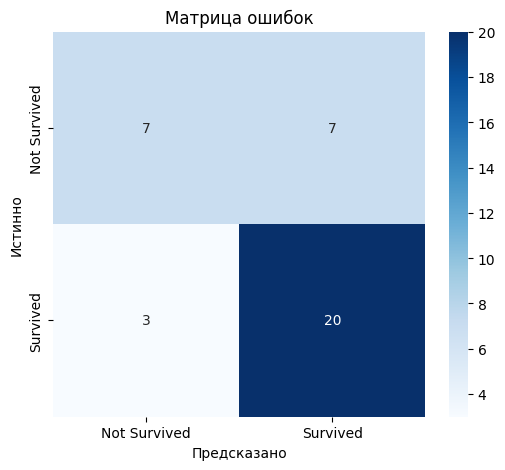

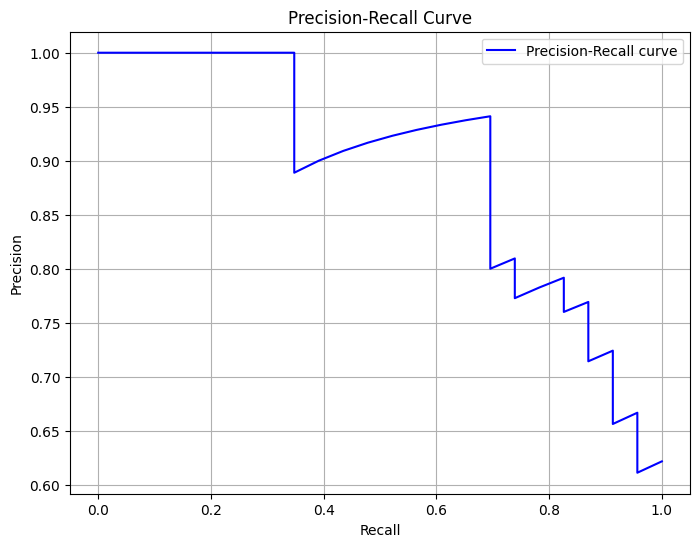

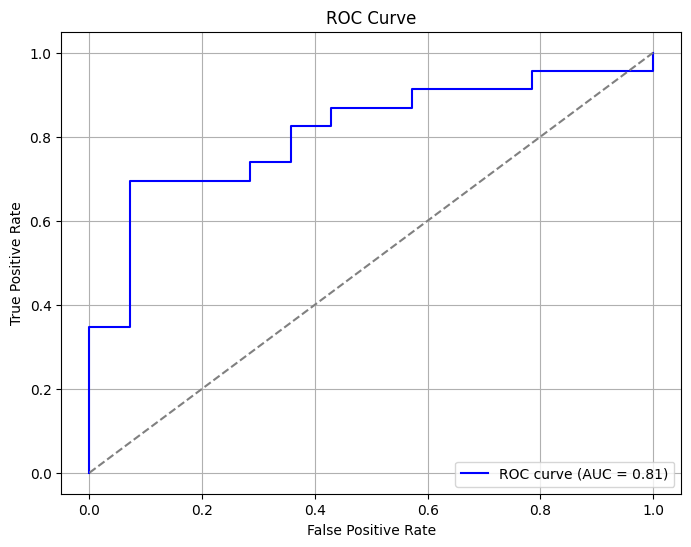

Precision: 0.74
Recall: 0.87
F1 Score: 0.80
AUC (ROC): 0.81

Оценка модели:
Хорошая модель — ROC AUC > 0.8, достаточно точна.
F1-score хороший: сбалансированная точность и полнота.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns

df = pd.read_csv('titanic.csv')

df_cleaned = df.dropna()
df_cleaned.loc[:, 'Sex'] = df_cleaned['Sex'].map({'male': 0, 'female': 1})
df_cleaned.loc[:, 'Embarked'] = df_cleaned['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

X = df_cleaned[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df_cleaned['Survived']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Получаем предсказания модели
y_pred = model.predict(X_test)

# Расчет Precision, Recall и F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Выводим метрики
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Тепловая карта
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.show()

# Получаем значения для кривой Precision-Recall
precision_vals, recall_vals, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Построение PRC
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Получаем значения для ROC кривой
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Построение ROC кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Линия случайной модели
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Итоговые метрики
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC (ROC): {roc_auc:.2f}')


# Вывод о качестве модели
print("\nОценка модели:")
if roc_auc > 0.9:
    print("Отличная модель — ROC AUC > 0.9, хорошо различает классы.")
elif roc_auc > 0.8:
    print("Хорошая модель — ROC AUC > 0.8, достаточно точна.")
elif roc_auc > 0.7:
    print("Удовлетворительная модель — есть ошибки, но можно использовать.")
else:
    print("Слабая модель — качество классификации низкое, возможны значительные ошибки.")

if precision < 0.7:
    print("Низкая точность: модель часто ошибается при прогнозе 'выжил'.")
if recall < 0.7:
    print("Низкая полнота: модель не находит всех, кто выжил.")
if f1 > 0.75:
    print("F1-score хороший: сбалансированная точность и полнота.")


SVC
Precision: 0.62
Recall: 1.00
F1 Score: 0.77
AUC (ROC): 0.73


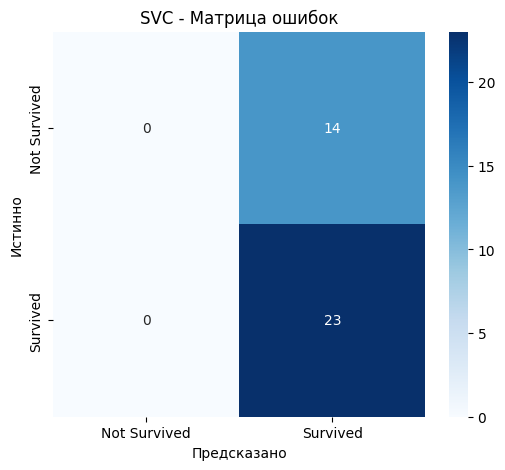

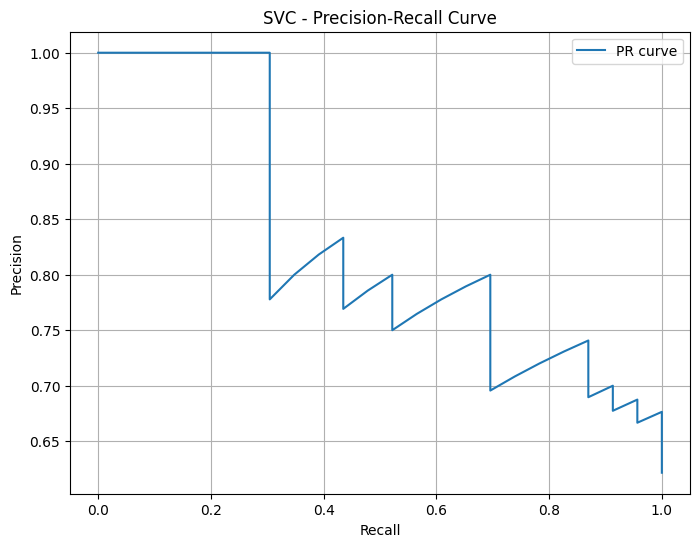

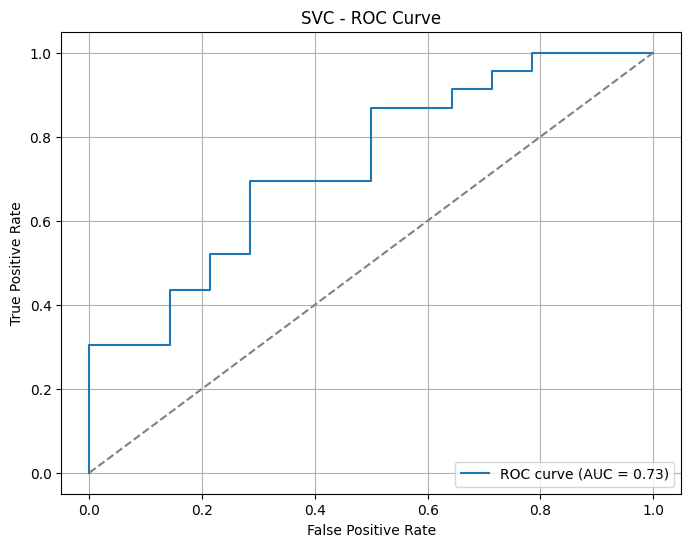


KNN
Precision: 0.68
Recall: 0.91
F1 Score: 0.78
AUC (ROC): 0.63


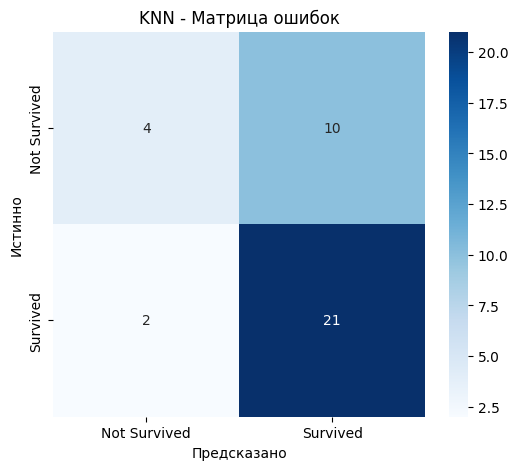

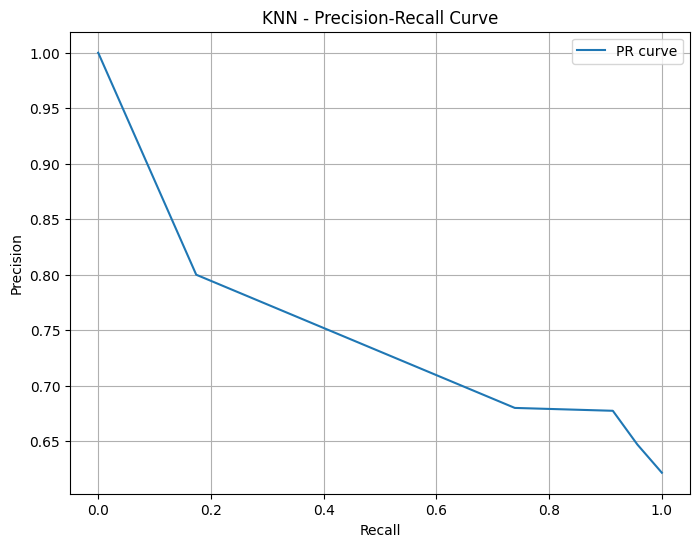

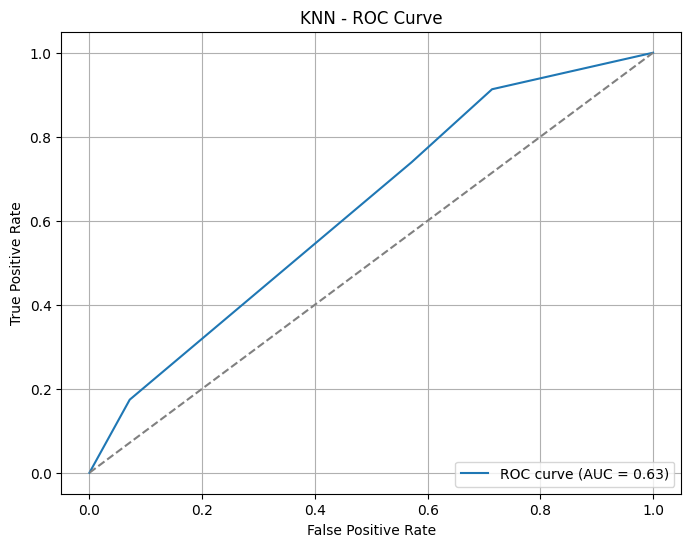

In [2]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    # Метрики
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    print(f'\n{name}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'AUC (ROC): {roc_auc:.2f}')

    # Матрица ошибок
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f'{name} - Матрица ошибок')
    plt.xlabel('Предсказано')
    plt.ylabel('Истинно')
    plt.show()

    # Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall_vals, precision_vals, label='PR curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{name} - Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Обучение и оценка модели SVC
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
evaluate_model("SVC", svm_model, X_test, y_test)

# Обучение и оценка модели KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
evaluate_model("KNN", knn_model, X_test, y_test)

In [3]:
def find_best_model(auc_values):
    # Сравнение AUC для всех моделей и вывод лучшей модели
    best_model = max(auc_values, key=auc_values.get)
    print(f'\nЛучший классификатор: {best_model} с AUC: {auc_values[best_model]:.2f}')

auc_scores = {
    "Logistic Regression": 0.81, 
    "SVC": 0.73,                 
    "KNN": 0.63                   
}

find_best_model(auc_scores)



Лучший классификатор: Logistic Regression с AUC: 0.81
